In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [65]:
cleaned_df = merged_df.drop(['start_year','original_title','id','movie'],axis=1)

grouped_df = cleaned_df.groupby('director_name').agg(
    {'movie_id': ['count'],
    'primary_title': lambda x: list(x),
     'production_budget': ['sum', 'mean'], 
     'worldwide_gross': ['sum', 'mean'],
     'Profit:Production Ratio': ['sum', 'mean'],
     'Profit': ['sum', 'mean']}
)

grouped_df.columns = [
    f"{col[0]}_{col[1]}" for col in grouped_df.columns
]

grouped_df[grouped_df['movie_id_count']>0].sort_values(by=['Profit:Production Ratio_mean'],ascending=False)

,movie_id_count,primary_title_<lambda>,production_budget_sum,production_budget_mean,worldwide_gross_sum,worldwide_gross_mean,Profit:Production Ratio_sum,Profit:Production Ratio_mean,Profit_sum,Profit_mean
director_name,,,,,,,,,,
Tod Williams,1,[Paranormal Activity 2],3000000,3000000.0,177512032,177512032.0,58.170677,58.170677,174512032,174512032.0
William Brent Bell,2,"[The Devil Inside, The Boy]",11000000,5500000.0,169980442,84990221.0,106.581585,53.290793,158980442,79490221.0
Bradley Parker,1,[Chernobyl Diaries],1000000,1000000.0,42411721,42411721.0,41.411721,41.411721,41411721,41411721.0
Jordan Peele,2,"[Get Out, Us]",25000000,12500000.0,509578261,254789130.5,61.784106,30.892053,484578261,242289130.5
Nitesh Tiwari,1,[Dangal],9500000,9500000.0,294654618,294654618.0,30.016276,30.016276,285154618,285154618.0
...,...,...,...,...,...,...,...,...,...,...
Tara Subkoff,1,[#Horror],1500000,1500000.0,0,0.0,-1.000000,-1.000000,-1500000,-1500000.0
Mahmoud Behraznia,1,[The Prince],18000000,18000000.0,0,0.0,-1.000000,-1.000000,-18000000,-18000000.0
Anthony O'Brien,1,[The Timber],2100000,2100000.0,0,0.0,-1.000000,-1.000000,-2100000,-2100000.0


/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


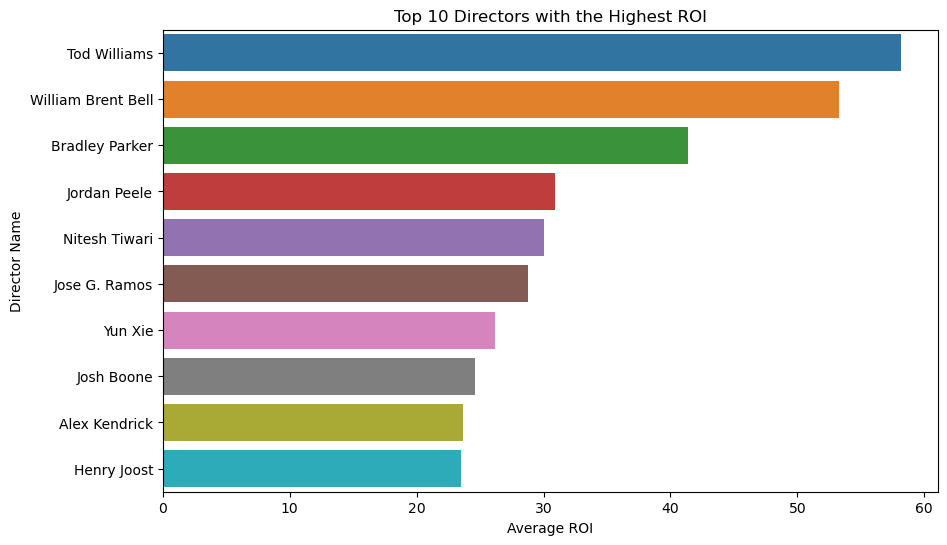

In [96]:
sorted_profit = grouped_df.reset_index().sort_values(by='Profit:Production Ratio_mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Profit:Production Ratio_mean', y='director_name', data=sorted_profit.head(10))

# Set the title and labels
plt.title('Top 10 Directors with the Highest ROI')
plt.xlabel('Average ROI')
plt.ylabel('Director Name')

plt.savefig('top 10 directors by ROI.png')

plt.show()


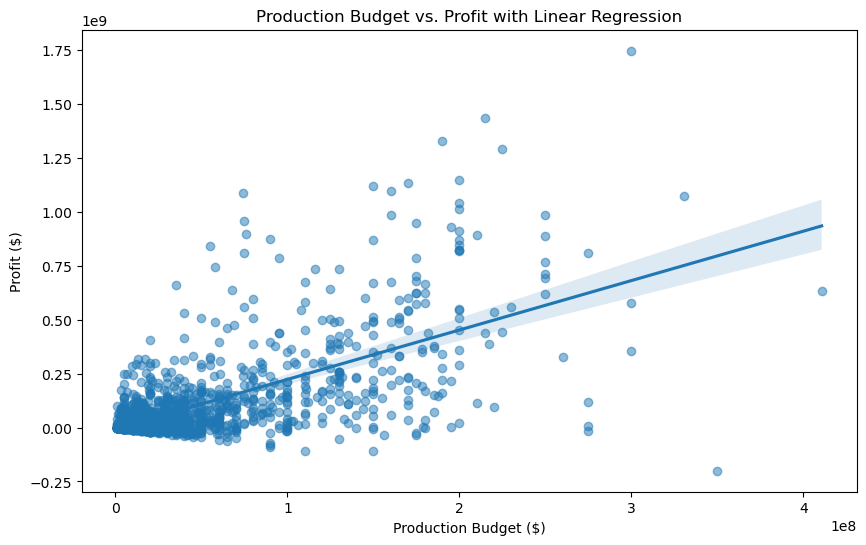

In [95]:
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='Profit', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Production Budget vs. Profit with Linear Regression')
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit ($)')

plt.savefig('production vs profit regression.png')
plt.show()

/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


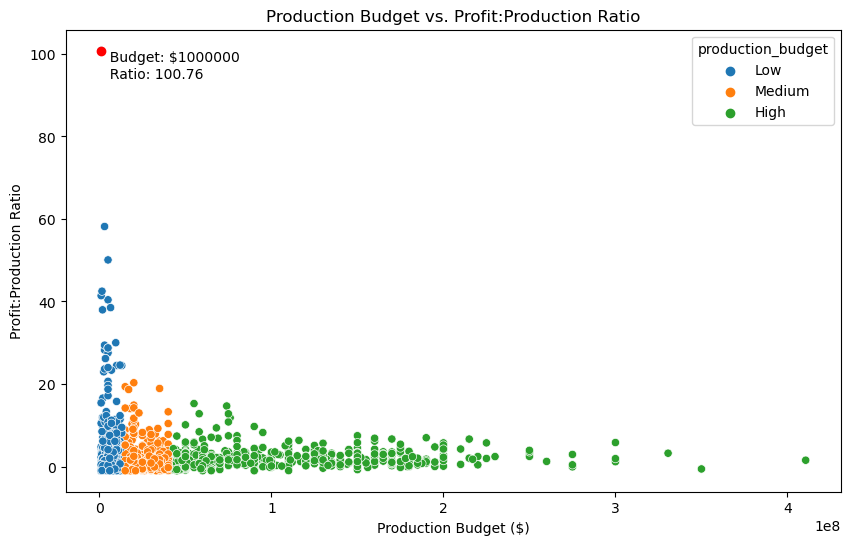

In [94]:
low_budget_threshold = merged_df['production_budget'].quantile(0.33)
medium_budget_threshold = merged_df['production_budget'].quantile(0.66)

# Assigning categories based on these thresholds
budget_categories = pd.cut(merged_df['production_budget'], 
                           bins=[0, low_budget_threshold, medium_budget_threshold, merged_df['production_budget'].max()], 
                           labels=['Low', 'Medium', 'High'])
# Plotting Production Budget vs. Worldwide Gross:Production Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Profit:Production Ratio', hue=budget_categories, data=merged_df)
plt.title('Production Budget vs. Profit:Production Ratio')
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit:Production Ratio')

# Highlighting the point with the maximum ratio
max_efficiency_point = merged_df.loc[merged_df['Worldwide Gross:Production Ratio'].idxmax()]
plt.scatter(max_efficiency_point['production_budget'], max_efficiency_point['Profit:Production Ratio'], color='red')
plt.text(max_efficiency_point['production_budget'], max_efficiency_point['Profit:Production Ratio'], 
         f"  Budget: ${int(max_efficiency_point['production_budget'])}\n  Ratio: {max_efficiency_point['Profit:Production Ratio']:.2f}", 
         verticalalignment='top')

plt.savefig('production vs ratio scatter.png')

plt.show()

In [90]:
grouped_df[(grouped_df['movie_id_count']>0) | (grouped_df['movie_id_count']>2)]

,movie_id_count,primary_title_<lambda>,production_budget_sum,production_budget_mean,worldwide_gross_sum,worldwide_gross_mean,Profit:Production Ratio_sum,Profit:Production Ratio_mean,Profit_sum,Profit_mean
director_name,,,,,,,,,,
Adam McKay,4,"[Anchorman 2: The Legend Continues, The Other ...",238000000,59500000.0,547168147,1.367920e+08,7.090279,1.772570,309168147,7.729204e+07
Adam Robitel,1,[Insidious: The Last Key],10000000,10000000.0,167885588,1.678856e+08,15.788559,15.788559,157885588,1.578856e+08
Adam Shankman,2,"[Rock of Ages, What Men Want]",90000000,45000000.0,130943835,6.547192e+07,2.367480,1.183740,40943835,2.047192e+07
Adam Wingard,1,[Blair Witch],10000000,10000000.0,38985577,3.898558e+07,2.898558,2.898558,28985577,2.898558e+07
Ahsan Rahim,1,[Teefa in Trouble],1500000,1500000.0,98806,9.880600e+04,-0.934129,-0.934129,-1401194,-1.401194e+06
...,...,...,...,...,...,...,...,...,...,...
Youssef Delara,1,[The Bounce Back],3000000,3000000.0,421404,4.214040e+05,-0.859532,-0.859532,-2578596,-2.578596e+06
Yun Xie,1,[Truth or Dare],3500000,3500000.0,95127344,9.512734e+07,26.179241,26.179241,91627344,9.162734e+07
Zach Braff,1,[Going in Style],24000000,24000000.0,78672579,7.867258e+07,2.278024,2.278024,54672579,5.467258e+07


In [97]:
merged_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit:Production Ratio,Worldwide Gross:Production Ratio
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,2012-12-31,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362,0.001638
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409,2.064409
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164,2.218164
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,6.669092,7.669092
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,-23455268,-0.521228,0.478772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,2019,55179495,6.131055,7.131055
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,2019-08-14,Blinded by the Light,15000000,0,0,2019,-15000000,-1.000000,0.000000
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,2018,1653715,0.330743,1.330743
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,2010-02-09,Icarus,6000000,0,0,2010,-6000000,-1.000000,0.000000
